### data load

In [2]:
import pandas as pd
import numpy as np

news_data = pd.read_csv("computer_science.csv")
news_data.head(5)

,section,news_id,title,dateline,provider_link_page
0,web developer,1400201.202,예산군 '기록관' 전국 자치단체 롤-모델 부각,2020-09-10T11:27:44.000+09:00,http://www.daejonilbo.com/news/newsitem.asp?pk...
1,web developer,1400601.202,'건강한 일터 자가진단 모형' 개발,2020-09-10T21:19:32.000+09:00,http://www.ccdailynews.com/news/articleView.ht...
2,web developer,8100201.202,신천지·발레학원이 지식산업?…이상한 '지식산업센터',2020-09-10T20:55:57.000+09:00,https://imnews.imbc.com/replay/2020/nwdesk/art...
3,web developer,1601001.202,산림조합 전북본부 2020 벌초도우미서비스 실시,2020-09-10T20:11:08.000+09:00,http://www.domin.co.kr/news/articleView.html?i...
4,web developer,7101201.202,올해의 천문연구원에 안영숙 박사,2020-09-10T18:59:11.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...


In [3]:
len(news_data)

68618

In [4]:
news_data['section'].unique()

array(['web developer', 'mobile developer', 'embedded developer',
       'data developer', 'AI developer', 'SIS developer', 'SW developer'],
      dtype=object)

### 데이터 전처리

In [5]:
news_data['title'] = news_data['title'].str.replace("[^\w | \s]", "")

In [6]:
news_data.head(5)

,section,news_id,title,dateline,provider_link_page
0,web developer,1400201.202,예산군 기록관 전국 자치단체 롤모델 부각,2020-09-10T11:27:44.000+09:00,http://www.daejonilbo.com/news/newsitem.asp?pk...
1,web developer,1400601.202,건강한 일터 자가진단 모형 개발,2020-09-10T21:19:32.000+09:00,http://www.ccdailynews.com/news/articleView.ht...
2,web developer,8100201.202,신천지발레학원이 지식산업이상한 지식산업센터,2020-09-10T20:55:57.000+09:00,https://imnews.imbc.com/replay/2020/nwdesk/art...
3,web developer,1601001.202,산림조합 전북본부 2020 벌초도우미서비스 실시,2020-09-10T20:11:08.000+09:00,http://www.domin.co.kr/news/articleView.html?i...
4,web developer,7101201.202,올해의 천문연구원에 안영숙 박사,2020-09-10T18:59:11.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...


### WPM (WordPiece Model) tokenizaton

In [8]:
import tensorflow_datasets as tfds

tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    news_data['title'], target_vocab_size=2**13)

In [9]:
print(tokenizer.subwords[:100])

['에_', '의_', '도_', '로_', '한_', '는_', '이_', '은_', '다', '이', '서_', '으로_', '과_', '와_', '코로나_', '가_', '출시', '지', '서비스_', '원_', 'AI_', '리', '수', '고_', '고', '을_', '대', '대_', '코로나19_', '기_', '전', '사업_', '자_', '시장_', '등_', '자', '정', '시', '사', '아', '어', '일', '원', '기', '스', '디지털_', '비', '성', '기업_', '부', '장', '인', '온라인_', '나', '유', '가', '도', '시스템_', '주', '미', '개최', '조', '로', '재', '한', '지원', '플랫폼_', '상', '클라우드_', '선정', '비대면_', '기술_', '세', '오', '소', '하는_', '라', '신', '스_', '까지_', '장_', '시대_', '첫_', '서', '동', '것', '수_', '보', '트', '한다', '화', '명', '무', '구축', '시_', '2020_', '구', '한국', '형_', '마']


In [9]:
print('Tokenized sample question: {}'.format(tokenizer.encode(news_data['title'][0])))

Tokenized sample question: [1287, 301, 1178, 248, 293, 1899, 1970, 1968, 771, 50, 470]


In [18]:
tokenizer.encode(news_data['title'][0])

[1287, 301, 1178, 248, 293, 1899, 1970, 1968, 771, 50, 470]

In [10]:
for idx in range(len(news_data)):
#     news_data['title'][idx] = [tokenizer.decode([num]) for num in tokenizer.encode(news_data['title'][idx])]
    news_data['title'][idx] = [num for num in tokenizer.encode(news_data['title'][idx])]

C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
news_data.head(6)

,section,news_id,title,dateline,provider_link_page
0,web developer,1400201.202,"[1287, 301, 1178, 248, 293, 1899, 1970, 1968, ...",2020-09-10T11:27:44.000+09:00,http://www.daejonilbo.com/news/newsitem.asp?pk...
1,web developer,1400601.202,"[7161, 42, 331, 3337, 127, 99, 110]",2020-09-10T21:19:32.000+09:00,http://www.ccdailynews.com/news/articleView.ht...
2,web developer,8100201.202,"[78, 6459, 160, 285, 389, 43, 7, 3399, 216, 12...",2020-09-10T20:55:57.000+09:00,https://imnews.imbc.com/replay/2020/nwdesk/art...
3,web developer,1601001.202,"[1901, 3529, 2228, 1500, 96, 5908, 57, 118, 60...",2020-09-10T20:11:08.000+09:00,http://www.domin.co.kr/news/articleView.html?i...
4,web developer,7101201.202,"[1963, 280, 172, 2595, 1, 113, 134, 2519, 2917]",2020-09-10T18:59:11.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...
5,web developer,7101201.202,"[599, 92, 81, 546, 1, 1347, 3114, 998, 135, 74...",2020-09-10T18:59:12.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...


In [72]:
news_data['news_id'].unique()

array([1400201.202, 1400601.202, 8100201.202, 1601001.202, 7101201.202,
       7100501.202, 2100601.202, 2100201.202, 2100311.202, 2100851.202,
       1101001.202, 2100801.202, 1400401.202, 1100501.202, 1100701.202,
       1300201.202, 1400701.202, 1400351.202, 2100501.202, 1500701.202,
       1400501.202, 1600501.202, 2100701.202, 1100611.202, 1100201.202,
       8100401.202, 1500301.202, 1500401.202, 1500901.202, 1100901.202,
       1100401.202, 1400551.202, 1500801.202, 1600301.202, 1300101.202,
       1700101.202, 1200101.202, 1600201.202, 1700201.202, 1100101.202,
       1600801.202, 1200201.202, 1500601.202, 1100301.202, 1500501.202,
       1500151.202, 1601101.202, 1500051.202, 8100301.202, 8200101.202,
       8100101.202])

### data preprocessing

In [81]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(words=[i.lower() for i in _d], 
                              tags=[idx]) for idx, _d in enumerate(news_data['title'])]

In [82]:
tagged_data[:5]

[TaggedDocument(words=['예산', '군 ', '기록', '관 ', '전국 ', '자치', '단체 ', '롤', '모델 ', '부', '각'], tags=[0]),
 TaggedDocument(words=['건강한 ', '일', '터 ', '자가진단 ', '모', '형 ', '개발'], tags=[1]),
 TaggedDocument(words=['신', '천지', '발', '레', '학', '원', '이 ', '지식', '산업', '이상', '한 ', '지식산업센터'], tags=[2]),
 TaggedDocument(words=['산림', '조합 ', '전북', '본부 ', '2020 ', '벌초', '도', '우', '미', '서비스 ', '실시'], tags=[3]),
 TaggedDocument(words=['올해의 ', '천', '문', '연구원', '에 ', '안', '영', '숙 ', '박사'], tags=[4])]

In [83]:
len(tagged_data)

68618

### Model train

In [84]:
max_epochs = 100
vec_size = 20
alpha = 0.025

d2v_model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
d2v_model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    d2v_model.train(tagged_data,
                total_examples=d2v_model.corpus_count,
                epochs=d2v_model.iter)
    # decrease the learning rate
    d2v_model.alpha -= 0.0002
    # fix the learning rate, no decay
    d2v_model.min_alpha = d2v_model.alpha

d2v_model.save("d2v.model")
print("Model Saved")

C:\Users\MyLaptop\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [91]:
# tags

d2v_model.docvecs.offset2doctag

[]

In [89]:
# vetors
d2v_model.docvecs.doctag_syn0

C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


array([[ 0.62977177, -6.0020404 , -3.0430608 , ..., -5.310898  ,
         0.26875967, -2.408109  ],
       [ 1.7644455 ,  0.976511  , -1.3608624 , ...,  2.2232146 ,
        -7.3721538 ,  4.118886  ],
       [ 4.5147076 ,  2.2187421 , -2.5592365 , ..., -4.35489   ,
         3.7881103 , -4.6801043 ],
       ...,
       [-2.3975663 , -1.0016649 ,  0.13753901, ...,  2.1369393 ,
         4.0569606 ,  1.6593772 ],
       [-2.9675379 ,  2.806499  , -5.6495695 , ...,  5.55664   ,
         5.066531  ,  5.2266197 ],
       [ 5.094768  ,  1.9410326 , -3.2910101 , ..., -4.487082  ,
        -1.598795  , -1.1193295 ]], dtype=float32)

### title => vetor

In [92]:
for idx, v in enumerate(d2v_model.docvecs.doctag_syn0):
    news_data['title'][idx] = v

C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.
C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
news_data.head(5)

,section,news_id,title,dateline,provider_link_page
0,web developer,1400201.202,"[0.62977177, -6.0020404, -3.0430608, 7.746626,...",2020-09-10T11:27:44.000+09:00,http://www.daejonilbo.com/news/newsitem.asp?pk...
1,web developer,1400601.202,"[1.7644455, 0.976511, -1.3608624, 1.514463, 0....",2020-09-10T21:19:32.000+09:00,http://www.ccdailynews.com/news/articleView.ht...
2,web developer,8100201.202,"[4.5147076, 2.2187421, -2.5592365, 1.9661222, ...",2020-09-10T20:55:57.000+09:00,https://imnews.imbc.com/replay/2020/nwdesk/art...
3,web developer,1601001.202,"[0.9904615, -0.093818046, 1.7925162, 0.8770222...",2020-09-10T20:11:08.000+09:00,http://www.domin.co.kr/news/articleView.html?i...
4,web developer,7101201.202,"[0.09731135, 5.122567, 0.17382027, 1.8286847, ...",2020-09-10T18:59:11.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...


### section one_hot_vector

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(news_data['section'])

LabelEncoder()

In [13]:
list(le.classes_)

['AI developer',
 'SIS developer',
 'SW developer',
 'data developer',
 'embedded developer',
 'mobile developer',
 'web developer']

In [14]:
news_data['section'] = le.transform(news_data['section'])

In [15]:
news_data.head(5)

,section,news_id,title,dateline,provider_link_page
0,6,1400201.202,"[1287, 301, 1178, 248, 293, 1899, 1970, 1968, ...",2020-09-10T11:27:44.000+09:00,http://www.daejonilbo.com/news/newsitem.asp?pk...
1,6,1400601.202,"[7161, 42, 331, 3337, 127, 99, 110]",2020-09-10T21:19:32.000+09:00,http://www.ccdailynews.com/news/articleView.ht...
2,6,8100201.202,"[78, 6459, 160, 285, 389, 43, 7, 3399, 216, 12...",2020-09-10T20:55:57.000+09:00,https://imnews.imbc.com/replay/2020/nwdesk/art...
3,6,1601001.202,"[1901, 3529, 2228, 1500, 96, 5908, 57, 118, 60...",2020-09-10T20:11:08.000+09:00,http://www.domin.co.kr/news/articleView.html?i...
4,6,7101201.202,"[1963, 280, 172, 2595, 1, 113, 134, 2519, 2917]",2020-09-10T18:59:11.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...


In [16]:
news_data.tail(5)

,section,news_id,title,dateline,provider_link_page
68613,2,7101201.202,"[4663, 3993, 7895, 131, 389, 3, 2712, 4995, 16...",2020-08-26T15:20:03.000+09:00,http://www.dt.co.kr/contents.html?article_no=2...
68614,2,1100701.202,"[2027, 165, 3, 848, 87, 52, 92, 2822, 1, 1591,...",2020-08-26T15:30:30.000+09:00,http://www.segye.com/content/html/2020/08/26/2...
68615,2,1100101.202,"[7250, 3413, 1, 2946, 3841, 157, 78, 5482, 2859]",2020-08-26T15:30:13.000+09:00,http://news.khan.co.kr/kh_news/khan_art_view.h...
68616,2,1101001.202,"[2946, 3841, 157, 336, 11, 3006, 3413, 12, 2859]",2020-08-26T15:48:52.000+09:00,http://www.hani.co.kr/arti/area/chungcheong/95...
68617,2,1100611.202,"[685, 63, 3, 742, 1695, 719, 15, 3646, 7895, 5...",2020-08-26T15:22:55.000+09:00,http://www.seoul.co.kr/news/newsView.php?id=20...


In [ ]:
# list(le.inverse_transform())

### train_test_split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news_data['title'].values, news_data['section'].values, 
                                                    test_size=0.2,
                                                    stratify=news_data['section'],
                                                    shuffle=True,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54894,), (13724,), (54894,), (13724,))

In [18]:
X_train

array([list([4721, 5303, 33, 1162, 78, 3199, 510, 42, 7440, 87, 7159, 5711, 7895, 3537, 4853, 3618]),
       list([2694, 651, 6979, 7895, 1153, 2226, 2636, 337, 113, 48, 5009, 124, 27, 14, 1096]),
       list([473, 28, 7026, 1347, 5520, 5912, 2582, 207, 1068, 6354, 7895, 7041, 5535]),
       ...,
       list([1341, 6182, 2393, 1536, 716, 76, 2139, 7167, 2014, 5626, 212, 4068, 563, 4269, 43]),
       list([132, 2989, 7947, 7038, 1749, 1896, 3, 7175, 1, 498, 848]),
       list([3382, 312, 46, 300, 984, 126, 3986, 7895, 7948, 7973, 7968, 5248, 7977, 5986, 7979, 3238, 707])],
      dtype=object)

### 우리에게 필요한 단어만 추출

In [21]:
from gensim.models.doc2vec import Doc2Vec

d2v_model= Doc2Vec.load("d2v.model")

VOCAB_SIZE = len(d2v_model.docvecs.doctag_syn0)
EMBEDDING_DIM = 20

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

C:\Users\MyLaptop\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """


In [22]:
for idx, word in enumerate(tokenizer.subwords):
    embedding_vector = d2v_model.infer_vector([word]) if word in tokenizer.subwords else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
embedding_matrix.shape

(68618, 20)

### 패딩

In [23]:
max_length = 0

for idx, data in enumerate(X_train):
    if max_length < len(data):
        max_length = len(data)
print(max_length)

95


In [84]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 95
X_train = pad_sequences(X_train, maxlen=max_length, dtype='float64')
X_test = pad_sequences(X_test, maxlen=max_length, dtype='float64')

### CNN

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Flatten

INPUT_LENGTH = max_length

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], input_length=INPUT_LENGTH, trainable=False))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrix=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 95, 20)            1372360   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 93, 256)           15616     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 1,389,775
Trainable params: 17,415
Non-trainable params: 1,372,360
_________________________________________________________________
Train on 54894 samples, validate on 13724 samples
Epoch 1/100
54894/54894 [==============================

54894/54894 [==============================] - 12s 214us/sample - loss: 1.5378 - val_loss: 1.9588
Epoch 66/100
54894/54894 [==============================] - 10s 174us/sample - loss: 1.5363 - val_loss: 1.9343
Epoch 67/100
54894/54894 [==============================] - 10s 176us/sample - loss: 1.5348 - val_loss: 1.9304
Epoch 68/100
54894/54894 [==============================] - 9s 166us/sample - loss: 1.5331 - val_loss: 1.9291
Epoch 69/100
54894/54894 [==============================] - 9s 165us/sample - loss: 1.5313 - val_loss: 1.9549
Epoch 70/100
54894/54894 [==============================] - 9s 166us/sample - loss: 1.5291 - val_loss: 1.9394
Epoch 71/100
54894/54894 [==============================] - 9s 165us/sample - loss: 1.5268 - val_loss: 1.9394
Epoch 72/100
54894/54894 [==============================] - 9s 165us/sample - loss: 1.5265 - val_loss: 1.9373
Epoch 73/100
54894/54894 [==============================] - 9s 165us/sample - loss: 1.5248 - val_loss: 1.9825
Epoch 74/100
54894/5

### 그래프

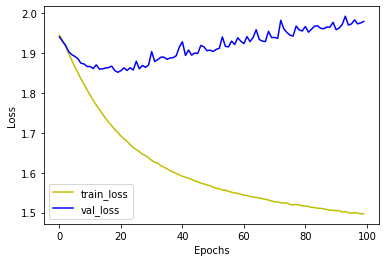

In [88]:
# val 그래프
plt.figure("val_graph")
plt.plot(history.history['loss'], 'y', label='train_loss')
plt.plot(history.history['val_loss'],'b', label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### test_data_tokenization

In [134]:
s = "취임 100일 김학도 중진공 이사장 포스트코로나 디지털혁신으로 중소벤처 성장 지원"
test_data = [tokenizer.decode([num]) for num in tokenizer.encode(s)]
v1 = d2v_model.infer_vector(test_data)
print(test_data)
print("")
print("V1_infer", v1)

['취임 ', '100일', ' ', '김', '학', '도 ', '중진공 ', '이사장 ', '포스트코로나 ', '디지털혁신', '으로 ', '중소', '벤처 ', '성장 ', '지원']

V1_infer [ 0.2421675   0.03730394 -0.5262478   0.5312966   0.01300814  0.03111137
 -0.35957956  0.23648357 -0.40715393  0.6428977  -0.52112985  0.03386642
 -0.40234062  0.46031618 -0.38961002  0.87212086  0.27304694 -0.13469835
 -0.16556157  0.44027072]


In [148]:
v2 = pad_sequences([v1], maxlen=max_length, dtype='float64')

In [153]:
v2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [127]:
v2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

### predict

In [154]:
result = model.predict_classes(v2)
result

array([0], dtype=int64)